# AISE4010 — Assignment 1 
### Time Series Forecasting with Autoregressive Models and MLP 

**Grade:** 100 points

## Instructions
Follow these steps before submitting your assignment:
1. Complete the notebook.
2. Make sure **all plots have axis labels**.
3. When finished, go to **Kernel → Restart & Run All** to ensure a clean, error‑free run.
4. Fix any errors until your notebook runs without problems.
5. Submit **one completed notebook** per group to OWL by the deadline.
6. Reference all external code and documentation you use.

## Dataset 
- **File:** `weather.csv`
- **Location:** Szeged, Hungary
- **Frequency:** Daily (fixed calendar index)
- **Time span:** ≈ 2006–2016
- **Target:** `Temperature (C)`
- **Key variables:** Temperature (C), Pressure (millibars), Humidity, Appar Temperature (C), Wind Speed (km/h), Wind Bearing (degrees), Visibility (km)


## Question 1: Data Preprocessing (25%)

### Q1.1 Exploratory Data Analysis (2%)
1. Load the dataset and print the **first 6 rows**.  
2. Encode categorical variables (one‑hot). *(If none, report "none.")*


In [1]:
# Answer to Q1.1.1
# Import packages
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the Dataset
df = pd.read_csv("weather.csv")

# Display the first 6 rows
print(df.head(6))

  Formatted Date  Temperature (C)  Apparent Temperature (C)  Humidity  \
0     2005-12-31              0.6                      -4.0      0.89   
1     2006-01-01              4.1                      -0.2      0.82   
2     2006-01-02              5.3                       1.8      0.85   
3     2006-01-03              2.3                       0.4      0.90   
4     2006-01-04              2.3                      -0.7      0.91   
5     2006-01-05              2.7                       0.4      0.95   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0               17.1                   140.0             10.0   
1               21.2                   143.0             11.3   
2               17.8                   165.0              8.5   
3                7.7                   253.0              9.2   
4               12.2                    35.0              8.4   
5                9.0                   140.0              4.3   

   Pressure (millibars)  
0     

In [2]:
# Answer to Q1.1.2
# Check for categorical variables (Variables that are not numerical)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# If We find categorical variables, one hot encode them,if none print "none"
if len(categorical_cols) == 0:
    print("none")
else:
    df_encoded = pd.get_dummies(df, columns=categorical_cols)
    print("One-hot encoded columns:", list(categorical_cols))
    print(df_encoded.head(6))

One-hot encoded columns: ['Formatted Date']
   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0              0.6                      -4.0      0.89               17.1   
1              4.1                      -0.2      0.82               21.2   
2              5.3                       1.8      0.85               17.8   
3              2.3                       0.4      0.90                7.7   
4              2.3                      -0.7      0.91               12.2   
5              2.7                       0.4      0.95                9.0   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                   140.0             10.0                1016.7   
1                   143.0             11.3                1012.0   
2                   165.0              8.5                1010.4   
3                   253.0              9.2                1021.2   
4                    35.0              8.4                 981.8   
5       

### Q1.2 Handling Missing Data (11%)
1. Report missingness (**counts & %**) and show a heatmap for **Temperature, Pressure, Humidity**.
2. Use these two imputation methods:\
   a) Forward-fill (FFill).\
   b) Linear time interpolation.
3. Pick one method and save the result as `daily_clean`.
4. **Discussion** Which imputation method did you pick and why?  
5. **Discussion** How might your choice bias trend/seasonality estimates?  
6. **Discussion** Would your choice change if the gap were 30 days instead of 7? Explain briefly.


Missing Values Exact Count:
Temperature (C)         47
Pressure (millibars)    47
Humidity                40
dtype: int64

Missing Values Percentage:
Temperature (C)         1.17
Pressure (millibars)    1.17
Humidity                1.00
dtype: float64


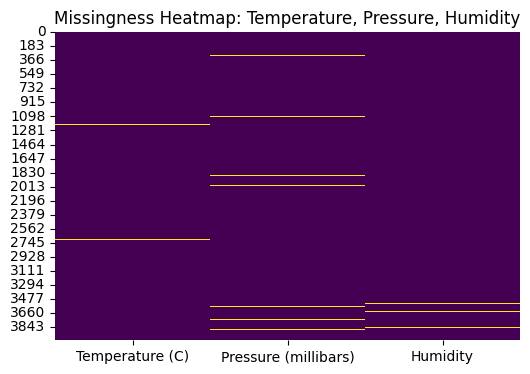

In [3]:
# Answer to Q1.2.1
# create column variable for the columns of interest
cols = ['Temperature (C)', 'Pressure (millibars)', 'Humidity']
missing_count = df[cols].isnull().sum() # Count of missing values
missing_percent = (df[cols].isnull().mean() * 100).round(2) # Percentage of missing values  

print("Missing Values Exact Count:") # Print the count of missing values
print(missing_count)
print("\nMissing Values Percentage:") # Print the percentage of missing values
print(missing_percent)

# Create a heatmap to visualize the missingness of the selected columns 
plt.figure(figsize=(6,4)) 
sns.heatmap(df[cols].isnull(), cbar=False, cmap="viridis") 
plt.title("Missingness Heatmap: Temperature, Pressure, Humidity")
plt.show()

In [4]:
# Answer to Q1.2.2
# Impute missing values with FFill method
df_filled_forward = df.fillna(method='ffill')

# Impute missing values with Linear Interpolation method
df_imputed_linear = df.interpolate(method='linear')

C:\Users\Callu\AppData\Local\Temp\ipykernel_11640\2857421514.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_forward = df.fillna(method='ffill')
C:\Users\Callu\AppData\Local\Temp\ipykernel_11640\2857421514.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_imputed_linear = df.interpolate(method='linear')


In [5]:
# Answer to Q1.2.3
# Choose linear interpolation as the better method for this dataset
daily_clean = df_imputed_linear

**Answer to Q1.2.4**: Linear Interpolation is the better option for time series data. This is because it estimates missing values based on trends between known data points, reducing bias and its better at maintaining patterns like seasonality. It's more robust for continuous variables and avoids flattening the data which happens in any fill method. **(might have this backwards but)Also note that FFill should not be used when predicting future values.


**Answer to Q1.2.5**: Lin Interpolation can bias trend and seasonality estimates by smoothing missing values, which may reduce variability and mess with sharp changes in trends. This can make the imputed data underestimate the true amplitude of the seasonality or mask big shifts messing with forecasting.


**Answer to Q1.2.6**: Yes. With such a high gap, the interpolation would become less reliable because it assumes a smooth change between known points. In these cases, the fill methods or more advanced methods might be considered depending on the importance of the missing data.


### Q1.3 Stationarity Analysis (12%)
1. Extract the **univariate** series `Temperature_Series = daily_clean['Temperature (C)']` and `Pressure_Series = daily_clean['Pressure (millibars)'].  
2. Report the results of a stationarity test (**ADF** or **KPSS**) for both series.
3. **Discussion:** Explain your conclusion about stationary analysis of your results. 
4. Apply differencing on both series and plot **before/after** and report the stationary test results of your choice on differenced series.   
5. **Discussion:** Explain the reason for your choice of differencing technique for each series.
6. **Discussion:** Would you difference a series that is already stationary by ADF? When might that still help?

In [6]:
# Answer to Q1.3.1
# Extract univariate series
Temperature_Series = daily_clean['Temperature (C)']
Pressure_Series = daily_clean['Pressure (millibars)']


In [7]:
# Answer to Q1.3.2
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
print("Results of ADF Test for Temperature Series")
adf_test(Temperature_Series)
print("\nResults of ADF Test for Pressure Series")
adf_test(Pressure_Series)


Results of ADF Test for Temperature Series
1. ADF :  -3.9851602146651444
2. P-Value :  0.0014902414944360158
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression: 4002
5. Critical Values :
	 1% :  -3.4319850573119437
	 5% :  -2.8622624788783146
	 10% :  -2.567154583183171

Results of ADF Test for Pressure Series
1. ADF :  -14.320986122573956
2. P-Value :  1.1413890089116514e-26
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression: 4013
5. Critical Values :
	 1% :  -3.431980572598556
	 5% :  -2.8622604977715755
	 10% :  -2.5671535285260605
1. ADF :  -14.320986122573956
2. P-Value :  1.1413890089116514e-26
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression: 4013
5. Critical Values :
	 1% :  -3.431980572598556
	 5% :  -2.8622604977715755
	 10% :  -2.5671535285260605


**Answer to Q1.2.3**: 
- For Both Temp and Pressure series, the ADF stat is much lower than the 1% crit value and the p - values are far below 0.05. This means we reject the null hypothesis, indicating that both series are stationary
- The pressure series has an especially low p-value and ADF stat indicating its strongly stationary where the temp series also shows strong evidence of stationary just not as much as the pressure series.


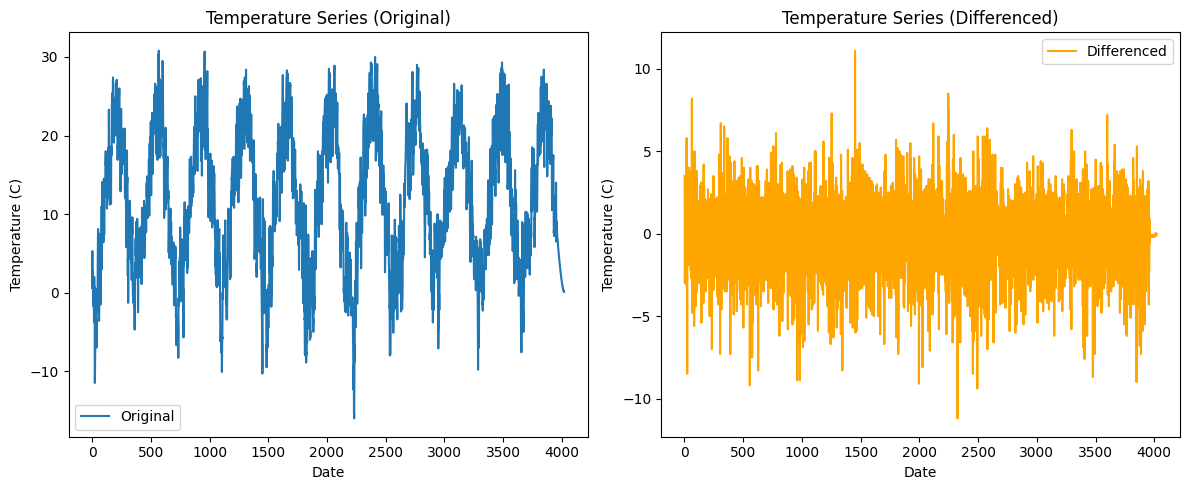

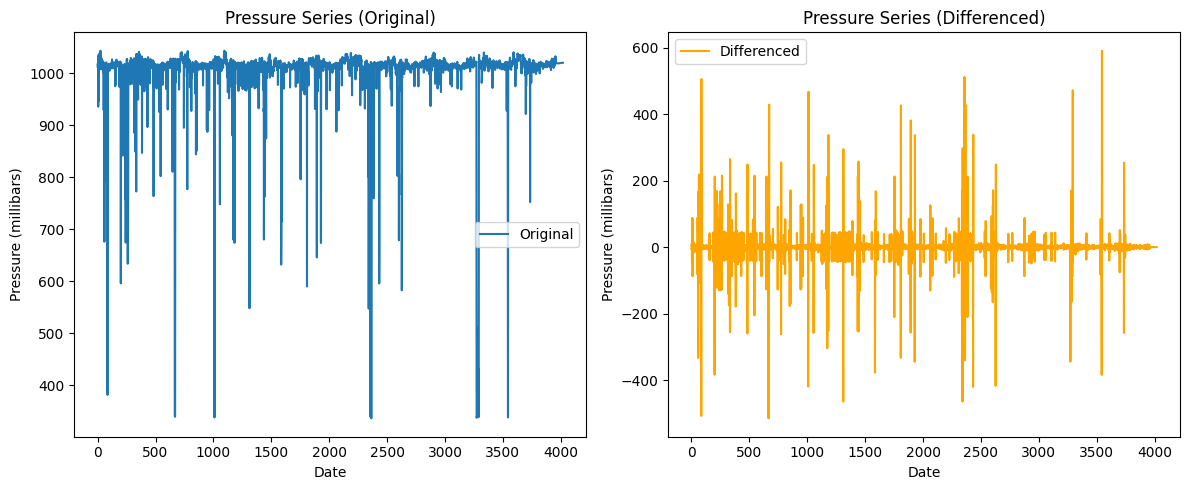

ADF Test for Differenced Temperature Series:
1. ADF :  -21.527851518885445
2. P-Value :  0.0
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression: 4002
5. Critical Values :
	 1% :  -3.4319850573119437
	 5% :  -2.8622624788783146
	 10% :  -2.567154583183171

ADF Test for Differenced Pressure Series:
1. ADF :  -16.503539658424142
2. P-Value :  2.1377374097248378e-29
3. Num Of Lags :  31
4. Num Of Observations Used For ADF Regression: 3986
5. Critical Values :
	 1% :  -3.431991624746321
	 5% :  -2.8622653800145192
	 10% :  -2.5671561276258172
1. ADF :  -16.503539658424142
2. P-Value :  2.1377374097248378e-29
3. Num Of Lags :  31
4. Num Of Observations Used For ADF Regression: 3986
5. Critical Values :
	 1% :  -3.431991624746321
	 5% :  -2.8622653800145192
	 10% :  -2.5671561276258172


In [8]:
# Answer to Q1.3.4
# Apply first-order differencing to both series
Temperature_diff = Temperature_Series.diff().dropna()
Pressure_diff = Pressure_Series.diff().dropna()

# Plot before and after differencing for Temperature
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(Temperature_Series, label='Original')
plt.title('Temperature Series (Original)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Temperature_diff, label='Differenced', color='orange')
plt.title('Temperature Series (Differenced)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot before and after differencing for Pressure
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(Pressure_Series, label='Original')
plt.title('Pressure Series (Original)')
plt.xlabel('Date')
plt.ylabel('Pressure (millibars)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Pressure_diff, label='Differenced', color='orange')
plt.title('Pressure Series (Differenced)')
plt.xlabel('Date')
plt.ylabel('Pressure (millibars)')
plt.legend()
plt.tight_layout()
plt.show()

# Run ADF test on differenced series
print("ADF Test for Differenced Temperature Series:")
adf_test(Temperature_diff)
print("\nADF Test for Differenced Pressure Series:")
adf_test(Pressure_diff)

**Answer to Q1.2.5**: For both series, First-Order Differencing was chosen because it is the standard technique to remove trends and stabalize the mean in time series datasets. For Time series data, the trends and patterns easier to maintain using first order differencing compared to other differencing techniques used in other models.


**Answer to Q1.2.6**: Differencing is often applied to confirm and visualize stationarity, and prepare data for models that assume stationary input. 

If a series is already stationary by ADF, further differencing is usually unnecessary and can introduce problems like noise. But, it might still help if there are subtle seasonal patterns, outliers or structural breaks that are not detected by the ADF test. It might need to be done depending on the approach being used.


## Question 2: Model-Based Techniques (35%)

### Q2.1 ARIMA model identification and forecasting (20%)
1. Use `Temperature_Series` to plot **ACF/PACF** and list the choice of candidate order set for ARIMA: (p,d,q).  
2. **Discussion:** Explain the reasons for your choice of (p,d,q).
3. Select the orders by **AIC** using the training set (hold out the last **365 days** for testing).  
4. Fit the selected ARIMA on the training set and evaluate the predictions' **MAE/MSE** on the test set.
5. Plot predictions with **95% CI**.
6. Forecast the **next 365 days** and visualize with historical context and **95% CI**.


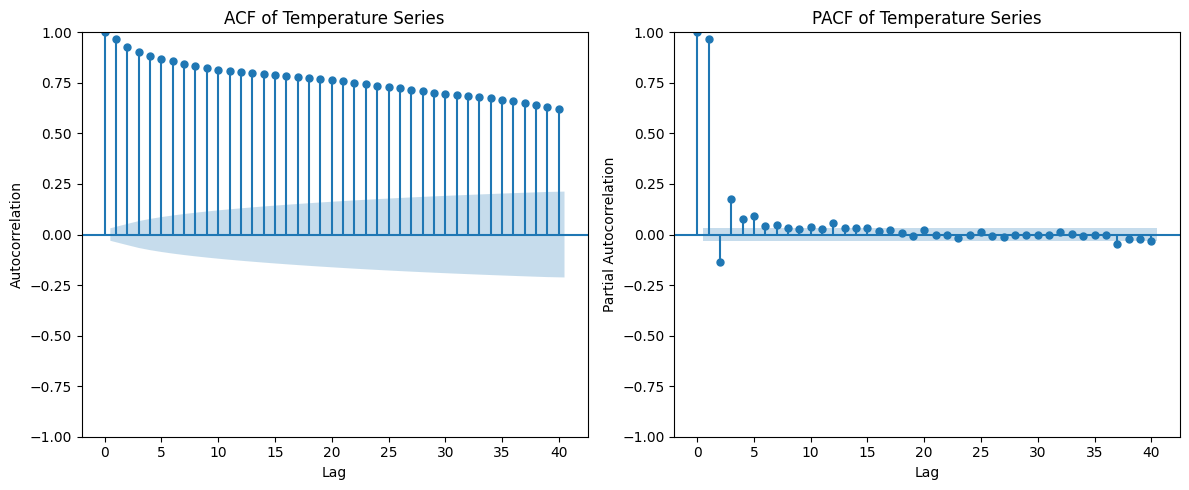

Candidate ARIMA order sets (p,d,q): [(1, 0, 1), (2, 0, 1), (1, 0, 2), (2, 0, 2)]


In [9]:
# Answer to Q2.1.1
# Plot ACF and PACF for Temperature_Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(Temperature_Series, ax=plt.gca(), lags=40)
plt.title('ACF of Temperature Series')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.subplot(1,2,2)
plot_pacf(Temperature_Series, ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF of Temperature Series')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.tight_layout()
plt.show()

# Candidate order set for ARIMA (p,d,q)
# Based on the ADF test, d=0 (series is stationary)
# Choose p and q by inspecting significant lags in ACF/PACF plots
# Example: If ACF cuts off after lag 1 and PACF after lag 2, try (2,0,1) and similar combinations
candidate_orders = [(1,0,1), (2,0,1), (1,0,2), (2,0,2)]
print('Candidate ARIMA order sets (p,d,q):', candidate_orders)

**Answer to Q2.1.2**: 
d = 0 because the ADF Test showed the sreies is stationary so no differencing is needed.
p and q: The ACF and PACF plots help identify significant lags. if the PACF cuts off after lag 1 or 2, it suggests an AR term (p=1 or 2). If the ACF cuts after lag 1 or 2, it suggests (q=1 or 2).
The orders chosen like (1,0,1), (2,0,1) ect are chosen to capture the main autocorrelation structure while keeping the model simple and avoiding overfitting.


In [10]:
# Answer to Q2.1.3
# Hold out the last 365 days for testing
train = Temperature_Series.iloc[:-365]
test = Temperature_Series.iloc[-365:]

from statsmodels.tsa.arima.model import ARIMA

# Candidate orders from previous cell
orders = [(1,0,1), (2,0,1), (1,0,2), (2,0,2)]
aic_scores = []

for order in orders:
    try:
        model = ARIMA(train, order=order).fit()
        aic_scores.append((order, model.aic))
        print(f'ARIMA{order} AIC: {model.aic:.2f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')

# Select the order with the lowest AIC
best_order = min(aic_scores, key=lambda x: x[1])[0]
print(f'Best ARIMA order by AIC: {best_order}')

ARIMA(1, 0, 1) AIC: 16020.96


C:\Users\Callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) AIC: 15993.09
ARIMA(1, 0, 2) AIC: 15953.77
ARIMA(1, 0, 2) AIC: 15953.77


C:\Users\Callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 0, 2) AIC: 15843.41
Best ARIMA order by AIC: (2, 0, 2)


In [11]:
# Answer to Q2.1.4
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit the best ARIMA model on the training set
model = ARIMA(train, order=best_order).fit()

# Forecast on the test set period
forecast_result = model.get_forecast(steps=len(test))
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Calculate MAE and MSE
mae = mean_absolute_error(test, forecast_mean)
mse = mean_squared_error(test, forecast_mean)
print(f"Test MAE: {mae:.3f}")
print(f"Test MSE: {mse:.3f}")

C:\Users\Callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test MAE: 7.729
Test MSE: 83.021


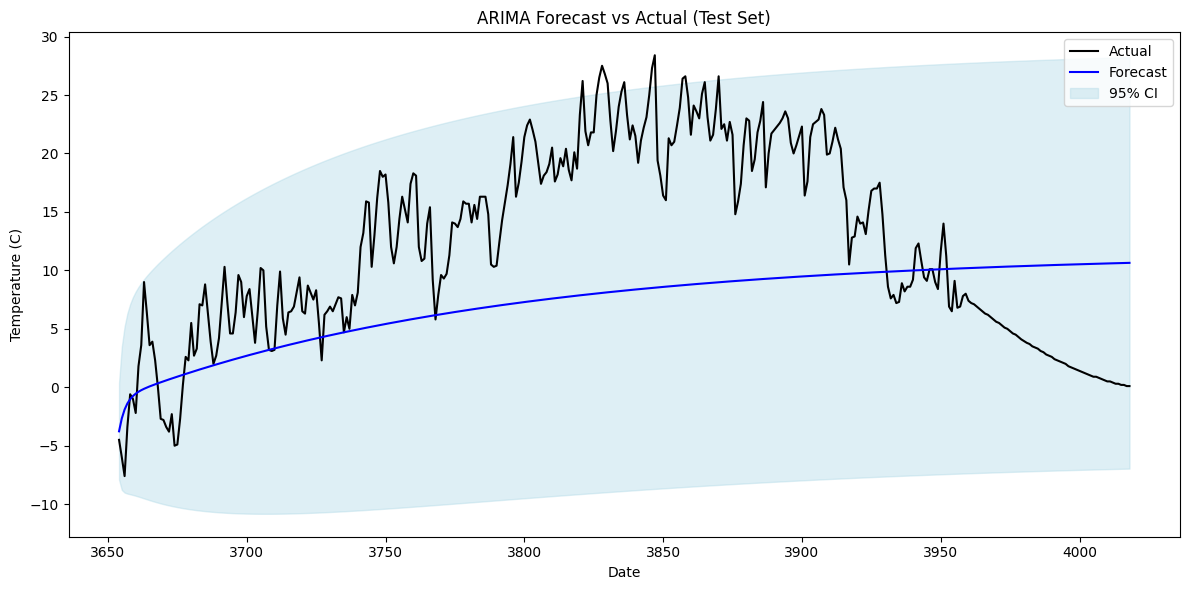

In [12]:
# Answer to Q2.1.5
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual', color='black')
plt.plot(test.index, forecast_mean, label='Forecast', color='blue')
plt.fill_between(test.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='lightblue', alpha=0.4, label='95% CI')
plt.title('ARIMA Forecast vs Actual (Test Set)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


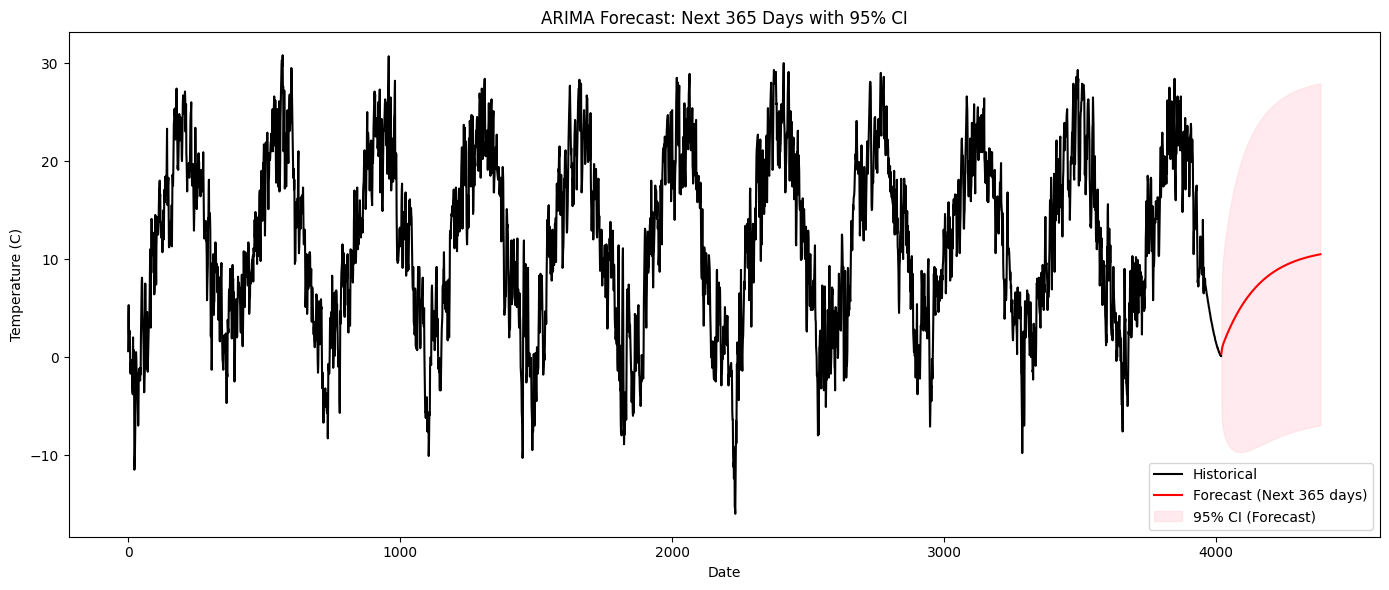

In [13]:
# Answer to Q2.1.6
# Refit ARIMA on the full series for future forecasting
full_model = ARIMA(Temperature_Series, order=best_order).fit()

# Forecast the next 365 days
future_steps = 365
future_forecast = full_model.get_forecast(steps=future_steps)
future_mean = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Build future index (assume daily frequency, continue from last date)
if hasattr(Temperature_Series.index, 'freq') and Temperature_Series.index.freq is not None:
    future_index = pd.date_range(start=Temperature_Series.index[-1] + Temperature_Series.index.freq, periods=future_steps, freq=Temperature_Series.index.freq)
else:
    # If index is not a DatetimeIndex with freq, just use integer index
    future_index = np.arange(Temperature_Series.index[-1]+1, Temperature_Series.index[-1]+1+future_steps)

# Plot historical and forecasted values with 95% CI
plt.figure(figsize=(14,6))
plt.plot(Temperature_Series.index, Temperature_Series, label='Historical', color='black')
plt.plot(future_index, future_mean, label='Forecast (Next 365 days)', color='red')
plt.fill_between(future_index, future_ci.iloc[:,0], future_ci.iloc[:,1], color='pink', alpha=0.3, label='95% CI (Forecast)')
plt.title('ARIMA Forecast: Next 365 Days with 95% CI')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.tight_layout()
plt.show()

### Q2.2 SARIMA forecasting (15%)

1. Derive a **monthly** series from `daily_clean` and fit a **SARIMA** with seasonal period **12**. Hold out the **last 24 months** as test set for prediction. 
2. Report the predictions' **MAE/MSE**.
3. Plot the the prediction with **95% CI** 
4.  **Discussion:** Compare the ARIMA and SARIMA predictions and explain your findings.


In [14]:
# Answer to Q2.2.1
# Ensure the DataFrame has a DatetimeIndex for resampling
if not isinstance(daily_clean.index, pd.DatetimeIndex):
    if 'Formatted Date' in daily_clean.columns:
        daily_clean['Formatted Date'] = pd.to_datetime(daily_clean['Formatted Date'])
        daily_clean = daily_clean.set_index('Formatted Date')
    elif 'Date' in daily_clean.columns:
        daily_clean['Date'] = pd.to_datetime(daily_clean['Date'])
        daily_clean = daily_clean.set_index('Date')
    else:
        raise ValueError('No datetime column found for resampling.')

# Resample daily_clean to monthly mean for Temperature
monthly_temp = daily_clean['Temperature (C)'].resample('M').mean()

# Hold out the last 24 months for testing
train_monthly = monthly_temp.iloc[:-24]
test_monthly = monthly_temp.iloc[-24:]

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example SARIMA order: (p,d,q)x(P,D,Q,12) -- you may tune these
sarima_order = (1,0,1)
seasonal_order = (1,0,1,12)

# Fit SARIMA model on training set
sarima_model = SARIMAX(train_monthly, order=sarima_order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)

# Forecast for the test set period
sarima_forecast = sarima_model.get_forecast(steps=len(test_monthly))
sarima_pred_mean = sarima_forecast.predicted_mean
sarima_pred_ci = sarima_forecast.conf_int()

C:\Users\Callu\AppData\Local\Temp\ipykernel_11640\2810286092.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = daily_clean['Temperature (C)'].resample('M').mean()


In [15]:
# Answer to Q2.2.2
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE for SARIMA predictions
sarima_mae = mean_absolute_error(test_monthly, sarima_pred_mean)
sarima_mse = mean_squared_error(test_monthly, sarima_pred_mean)
print(f"SARIMA Test MAE: {sarima_mae:.3f}")
print(f"SARIMA Test MSE: {sarima_mse:.3f}")

SARIMA Test MAE: 0.913
SARIMA Test MSE: 1.606


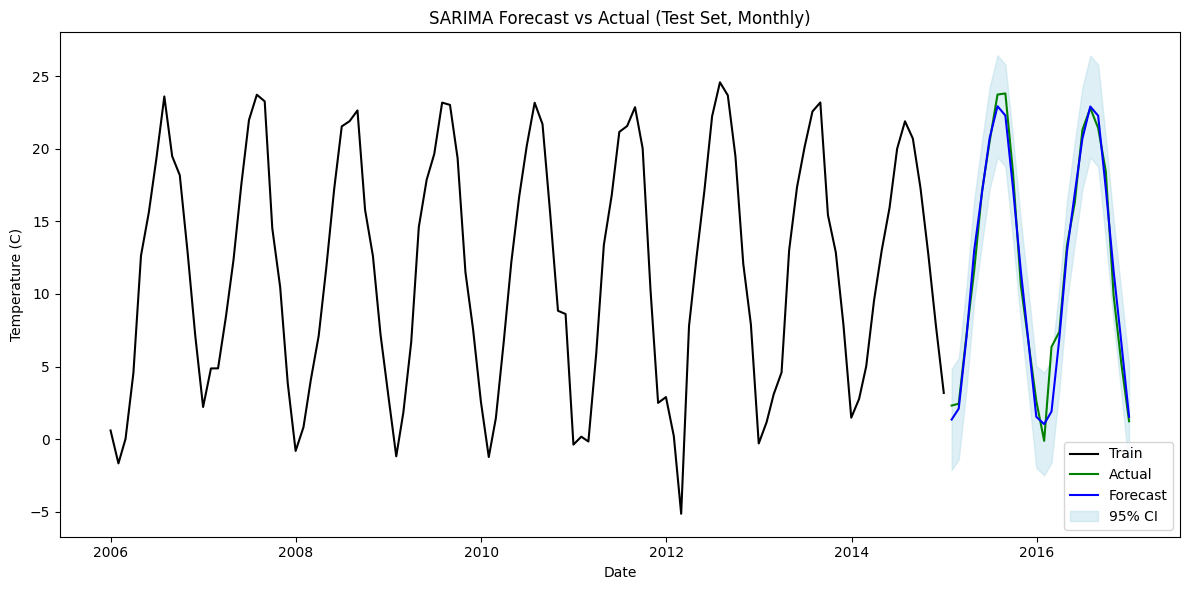

In [16]:
# Answer to Q2.2.3
plt.figure(figsize=(12,6))
plt.plot(train_monthly.index, train_monthly, label='Train', color='black')
plt.plot(test_monthly.index, test_monthly, label='Actual', color='green')
plt.plot(test_monthly.index, sarima_pred_mean, label='Forecast', color='blue')
plt.fill_between(test_monthly.index, sarima_pred_ci.iloc[:,0], sarima_pred_ci.iloc[:,1], color='lightblue', alpha=0.4, label='95% CI')
plt.title('SARIMA Forecast vs Actual (Test Set, Monthly)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.tight_layout()
plt.show()

**Answer to Q2.2.4**: Sarima models predictions were much more accurate then Arima. This is due to the seasonality component that ARIMA has problems working with compared to SARIMA which is capable of understanding seasonal components of data.


## Question 3: Neural Networks for Time Series Forecasting (40%)
Use `daily_clean` for all parts.

### Q3.1 Sliding Window for Time Series — Univariate (2%)
1. Restructure **Temperature**: past **10 days** → **next day**

2. Hold out last 20% as test set.


In [17]:
# Answer to Q3.1.1
# Restructure Temperature: past 10 days -> next day (sliding window)
import numpy as np

window_size = 10
temp_series = daily_clean['Temperature (C)'].values

X = []
y = []
for i in range(len(temp_series) - window_size):
    X.append(temp_series[i:i+window_size])
    y.append(temp_series[i+window_size])
X = np.array(X)
y = np.array(y)

print(f'Shape of X: {X.shape}')  # (num_samples, 10)
print(f'Shape of y: {y.shape}')  # (num_samples,)

Shape of X: (4009, 10)
Shape of y: (4009,)


In [18]:
# Answer to Q3.1.2
# Hold out last 20% as test set for sliding window data
num_samples = X.shape[0]
test_size = int(num_samples * 0.2)
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

print(f'Train set shape: X={X_train.shape}, y={y_train.shape}')
print(f'Test set shape: X={X_test.shape}, y={y_test.shape}')

Train set shape: X=(3208, 10), y=(3208,)
Test set shape: X=(801, 10), y=(801,)


### Q3.2 MLP — Univariate (18%)
1. Build an MLP with one hidden layer of 64 neurons, ReLu activation, Adam optimizer with learning rate of 0.001 and batch_size=32, and train it for 20 epochs. 
2. Report **RMSE/MAE**.
3. Plot **two figures**: (1) **last 100 test points** (true vs. predicted), (2) **scatter (true vs. predicted)** with the **y = x** line.
4. **Discussion:** Compare ARIMA vs. the univariate MLP in **RMSE/MAE** and **plots**. Which patterns does each capture better? 
5. **Discussion:** Would increasing the input window beyond 10 days help? Why or why not?


In [19]:
# Answer to Q3.2.1, Q3.2.2, Q3.2.3
# Build and train MLP for univariate time series forecasting
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Build the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', learning_rate_init=0.001, batch_size=32, max_iter=20, random_state=42, verbose=True)

# Train the model
mlp.fit(X_train, y_train)

# Predict on test set
y_pred = mlp.predict(X_test)


Iteration 1, loss = 5.21950957
Iteration 2, loss = 3.17061916
Iteration 3, loss = 2.82236660
Iteration 4, loss = 2.79265363
Iteration 5, loss = 2.58353613
Iteration 6, loss = 2.49692168
Iteration 7, loss = 2.46501507
Iteration 8, loss = 2.43166438
Iteration 9, loss = 2.42770277
Iteration 10, loss = 2.42273382
Iteration 11, loss = 2.39726845
Iteration 12, loss = 2.35424779
Iteration 13, loss = 2.37611702
Iteration 14, loss = 2.39882391
Iteration 15, loss = 2.32971817
Iteration 16, loss = 2.33584742
Iteration 17, loss = 2.31656748
Iteration 18, loss = 2.27488163
Iteration 19, loss = 2.32672120
Iteration 20, loss = 2.28212715
Iteration 17, loss = 2.31656748
Iteration 18, loss = 2.27488163
Iteration 19, loss = 2.32672120
Iteration 20, loss = 2.28212715


C:\Users\Callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
# Answer to Q3.2.2
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")

Test RMSE: 2.026
Test MAE: 1.588


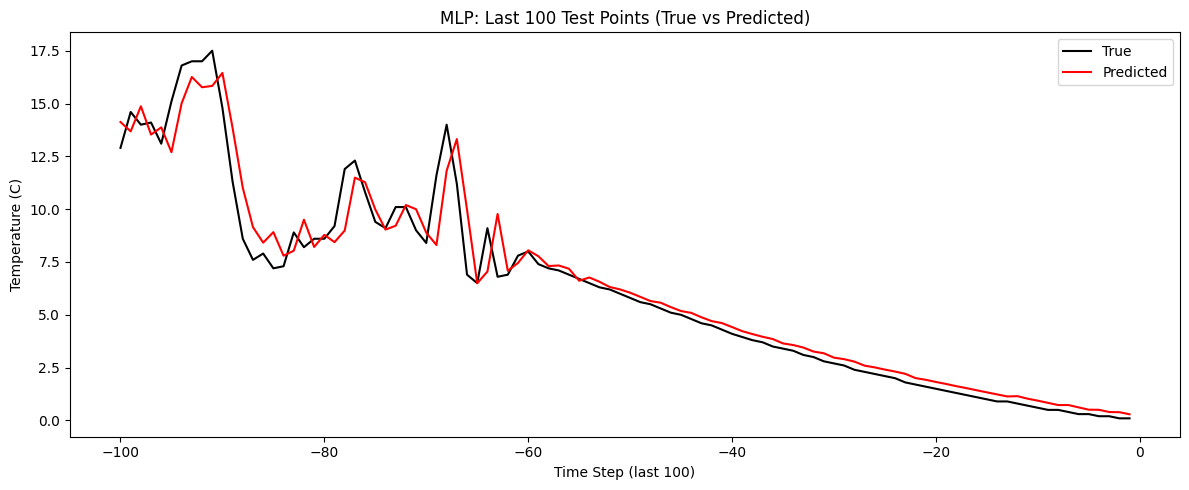

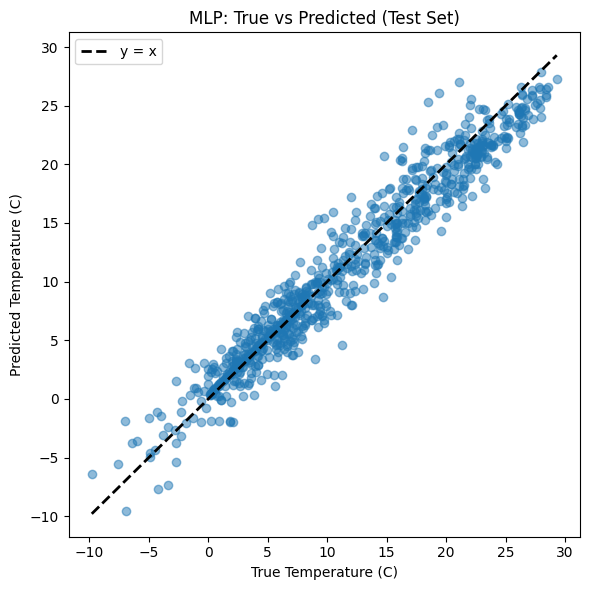

In [21]:
# Answer to Q3.2.3
# Plot last 100 test points: true vs predicted
plt.figure(figsize=(12,5))
plt.plot(range(-100,0), y_test[-100:], label='True', color='black')
plt.plot(range(-100,0), y_pred[-100:], label='Predicted', color='red')
plt.title('MLP: Last 100 Test Points (True vs Predicted)')
plt.xlabel('Time Step (last 100)')
plt.ylabel('Temperature (C)')
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot: true vs predicted with y=x line
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='y = x')
plt.title('MLP: True vs Predicted (Test Set)')
plt.xlabel('True Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.legend()
plt.tight_layout()
plt.show()

**Answer to Q3.2.4**: 




**Answer to Q3.2.5**: Increasing the window beyond 10 days can help if the target depends on longer-term patterns. A longer window gives the MLP more context to learn. That being said if all the relevant info is contained in the last 10 days then increasing the window may add noise, complexity and risk overfitting.


### Q3.3 MLP — Multivariate (20%)
1. Use **Temperature & Pressure** for the past **10 days** as the inputs and **next‑day Temperature** as the target. 
2. Hold out last 20% as test set.
3. Build a Multivariate MLP with one hidden layer of 64 neurons, ReLu activation, Adam optimizer with learning rate of 0.001 and batch_size=32, and train it for 20 epochs. 
4. Report **RMSE/MAE**.
5. Plot **two figures**: (1) **last 100 test points** (true vs. predicted), (2) **scatter (true vs. predicted)** with the **y = x** line.
6. **Discussion:** Did Pressure improve Temperature forecasting vs. univariate? Why might it help/hurt?  
7. **Discussion:** Suggest two additional features you would add next and why?


In [27]:
# Answer to Q3.3.1
# Use Temperature & Pressure for the past 10 days as inputs, next-day Temperature as target

window_size = 10
temp_series = daily_clean['Temperature (C)'].values
pressure_series = daily_clean['Pressure (millibars)'].values

X_multi = []
y_multi = []
for i in range(len(temp_series) - window_size):
    # Stack temp and pressure for each day in the window, then flatten
    features = np.column_stack((temp_series[i:i+window_size], pressure_series[i:i+window_size])).flatten()
    X_multi.append(features)
    y_multi.append(temp_series[i+window_size])  # next-day temperature

X_multi = np.array(X_multi)
y_multi = np.array(y_multi)

print(f'Shape of X_multi: {X_multi.shape}')  # (num_samples, 20)
print(f'Shape of y_multi: {y_multi.shape}')  # (num_samples,)

Shape of X_multi: (4009, 20)
Shape of y_multi: (4009,)


In [28]:
# Answer to Q3.3.2
# Hold out last 20% as test set for multivariate sliding window data
num_samples_multi = X_multi.shape[0]
test_size_multi = int(num_samples_multi * 0.2)
X_multi_train, X_multi_test = X_multi[:-test_size_multi], X_multi[-test_size_multi:]
y_multi_train, y_multi_test = y_multi[:-test_size_multi], y_multi[-test_size_multi:]

print(f'Train set shape: X={X_multi_train.shape}, y={y_multi_train.shape}')
print(f'Test set shape: X={X_multi_test.shape}, y={y_multi_test.shape}')

Train set shape: X=(3208, 20), y=(3208,)
Test set shape: X=(801, 20), y=(801,)


In [29]:
# Answer to Q3.3.3

from sklearn.neural_network import MLPRegressor #import MLP model

mlp_multi = MLPRegressor( #define MLP model
    hidden_layer_sizes=(64,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    batch_size=32,
    max_iter=20,
    random_state=42,
    verbose=True
)

mlp_multi.fit(X_multi_train, y_multi_train) #train the model

Iteration 1, loss = 3993.73462601
Iteration 2, loss = 277.37995848
Iteration 3, loss = 168.28036677
Iteration 4, loss = 110.12779516
Iteration 5, loss = 73.06919573
Iteration 6, loss = 52.51003476
Iteration 7, loss = 45.48536595
Iteration 8, loss = 34.32181449
Iteration 9, loss = 28.60649773
Iteration 10, loss = 23.51749984
Iteration 11, loss = 20.10607815
Iteration 12, loss = 18.97817147
Iteration 13, loss = 15.76238091
Iteration 14, loss = 14.17989608
Iteration 15, loss = 11.34087215
Iteration 16, loss = 10.57451876
Iteration 17, loss = 11.09377078
Iteration 18, loss = 9.18233383
Iteration 19, loss = 9.35129375
Iteration 20, loss = 8.37516177
Iteration 16, loss = 10.57451876
Iteration 17, loss = 11.09377078
Iteration 18, loss = 9.18233383
Iteration 19, loss = 9.35129375
Iteration 20, loss = 8.37516177


C:\Users\Callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=32, hidden_layer_sizes=(64,), max_iter=20,
             random_state=42, verbose=True)

In [30]:
# Answer to Q3.3.4
y_multi_pred = mlp_multi.predict(X_multi_test)
rmse_multi = np.sqrt(mean_squared_error(y_multi_test, y_multi_pred))
mae_multi = mean_absolute_error(y_multi_test, y_multi_pred)

print(f"Test RMSE: {rmse_multi:.3f}")
print(f"Test MAE: {mae_multi:.3f}")

Test RMSE: 6.800
Test MAE: 5.110


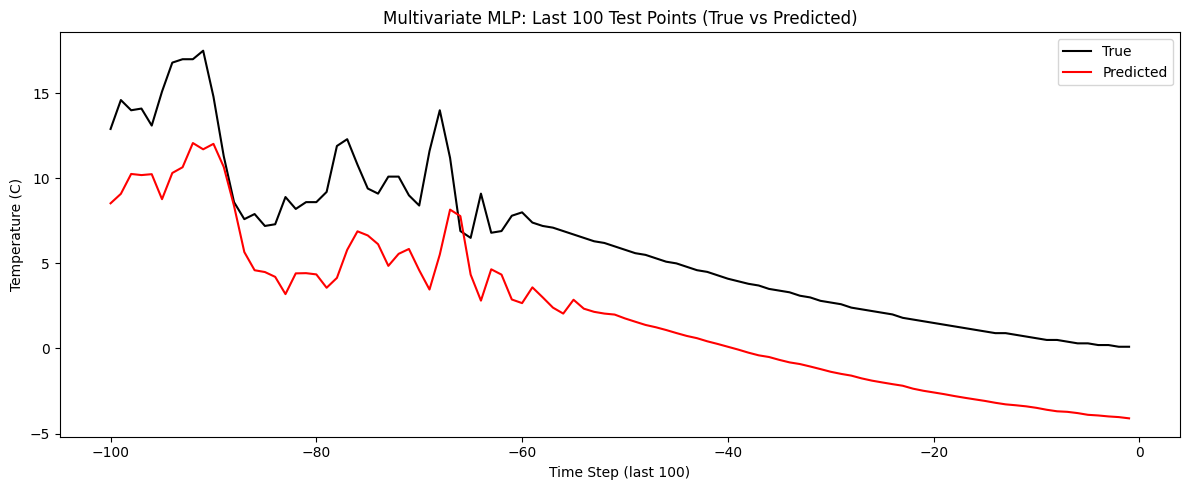

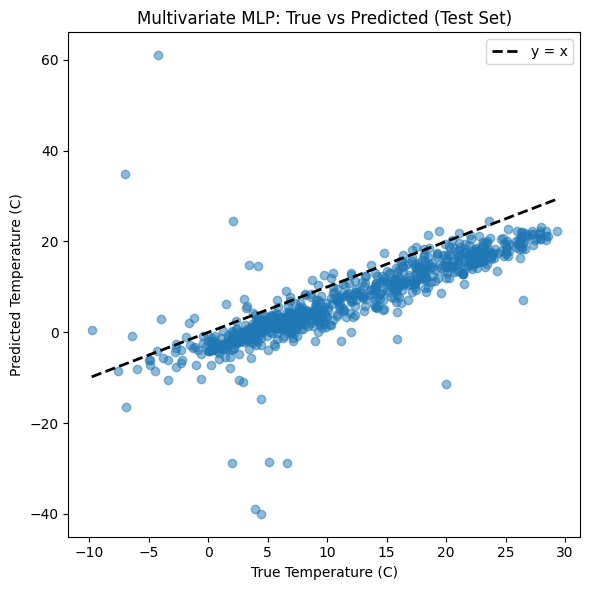

In [31]:
# Answer to Q3.3.5
# (1) Last 100 test points: true vs. predicted
plt.figure(figsize=(12,5))
plt.plot(range(-100, 0), y_multi_test[-100:], label='True', color='black')
plt.plot(range(-100, 0), y_multi_pred[-100:], label='Predicted', color='red')
plt.title('Multivariate MLP: Last 100 Test Points (True vs Predicted)')
plt.xlabel('Time Step (last 100)')
plt.ylabel('Temperature (C)')
plt.legend()
plt.tight_layout()
plt.show()

# (2) Scatter plot: true vs. predicted with y=x line
plt.figure(figsize=(6,6))
plt.scatter(y_multi_test, y_multi_pred, alpha=0.5)
plt.plot([y_multi_test.min(), y_multi_test.max()], [y_multi_test.min(), y_multi_test.max()], 'k--', lw=2, label='y = x')
plt.title('Multivariate MLP: True vs Predicted (Test Set)')
plt.xlabel('True Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.legend()
plt.tight_layout()
plt.show()

**Answer to Q3.3.6**: Based on my results, It hurt the prediction. This might be beause the additional relationship might not have the best correlation which would make it so the model becomes noisy. Adding aditional relationships (in this case pressure) works when there is strong correlation between the 2 features.


**Answer to Q3.3.7**: If we are talking about new data that could help correlate with temperature I would suggest 1. Humidity which often affects how temperature changes, and 2 the apparent temperature (or the feels like) which would reflect how hot or cold it actually fells. These may provide extra context when predicting the temperature.
